Team: Gamma 1


---

Noah Merenbloom, Cameron Santos, Trey Tanjuatco, Sam Gomez Olvera, Justin Schmitt,  Daisy Zhou

# **Python Notebook Setup**


*   Installing pickle5
*   Importing packages/dependencies needed for cleaning and imputing
*   Mounting Google Drive



In [ ]:
!pip3 install pickle5
import pickle5 as pickle
import numpy as np
import pandas as pd
import statistics as stat
from google.colab import drive
drive.mount('/content/gdrive/')

     |████████████████████████████████| 133kB 6.2MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219248 sha256=5986ac372edfc708c45ec5381ceaeaab5fc3f91ac72d66aa4aa0239b1f2c8a4c
  Stored in directory: /root/.cache/pip/wheels/a6/90/95/f889ca4aa8b0e0c7f21c8470b6f5d6032f0390a3a141a9a3bd
Successfully built pickle5
Mounted at /content/gdrive/


# **Reading in CSV/PKL Data**
* Loading in the csv files
- Takes a long time and uses a lot of RAM!
* Converting .csv data into a Pandas dataframe, getting a first glance at the data
* Used JupyterLab to convert dataFrames to pkl format so that we could read from pkl in the future...much faster/efficient


In [ ]:


# rdata = pickle.load(open('/content/gdrive/MyDrive/COLLEGE/Senior/S2/BUSI_488/a02/Gamma 1 Project 2/rejected_pickle.pkl', 'rb')) #<-- PATH to NOAH's drive
# adata = pickle.load(open('/content/gdrive/MyDrive/COLLEGE/Senior/S2/BUSI_488/a02/Gamma 1 Project 2/accepted_pickle.pkl', 'rb')) #<-- PATH to NOAH's drive

# adata = pd.read_csv(open('/content/accepted_2007_to_2018Q4.csv')) # <-- PATH to TREY's local storage

# adata = pd.read_csv(open('/content/gdrive/MyDrive/accepted_2007_to_2018Q4.csv')) # <-- PATH to CAM's local storage (csv)

rdata = pickle.load(open('/content/gdrive/MyDrive/rejected_pickle.pkl', 'rb')) #<-- PATH to Cam's drive
adata = pickle.load(open('/content/gdrive/MyDrive/accepted_pickle.pkl', 'rb')) #<-- PATH to Cam's drive

# adata = pd.read_csv(open('/content/gdrive/MyDrive/BUSI488/a2/Gamma 1 Project 2/accepted_2007_to_2018Q4.csv', 'rb')) # <- Path to DAISY's drive

#  adata = pd.read_csv(open('/content/gdrive/MyDrive/Spring2021/BUSI488/Gamma 1 Project 2/accepted_2007_to_2018Q4.csv', 'rb'))  
#  rdata = pd.read_csv(open('/content/gdrive/MyDrive/Spring2021/BUSI488/Gamma 1 Project 2/rejected_2007_to_2018Q4.csv', 'rb'))

# adata = pd.read_csv('accepted_2007_to_2018Q4.csv')
# rdata = pd.read_csv(('rejected_2007_to_2018Q4.csv'))






FileNotFoundError: ignored

In [ ]:
adf = pd.DataFrame(adata)
rdf = pd.DataFrame(rdata)

NameError: ignored

In [ ]:
print(len(adf))
print(len(rdf))
adf.head()
rdf.head()


#  **Accepted/Rejected Model Cleaning and Imputing**
- Drop columns in Accepted data so that its feautres match up with the 9 features of the Rejected data
- Impute NaN values
- Clean values so that they can be better transformed and modeled
- Concatenate rejected and accepted data
- `adf` = 'accepted data'
- `rdf` = 'rejected data'
- `combodf` = accepted and rejected concatenated

 **Cleaning Accepted Data**

In [ ]:
## START HERE

#Only keep the features we want, those that will match up with the 9 features in the rejected dataset
adf_cleaned = adf[['loan_amnt', 'issue_d', 'purpose', 'fico_range_low', 'fico_range_high', 'dti', 'zip_code', 'addr_state', 'emp_length', 'policy_code']]

In [ ]:
# impute adf purpose
adf_cleaned['purpose'] = adf_cleaned['purpose'].fillna('other')

# impute adf dti
adf_cleaned['dti'] = adf_cleaned['dti'].fillna(adf_cleaned['dti'].mean())

#drop entries with no loan amount...what can we do without a loan amount
adf_cleaned = adf_cleaned[adf_cleaned['loan_amnt'].notna()]

#there is one single entry with no date and has NaN for most values also; drop it
adf_cleaned = adf_cleaned[adf_cleaned['issue_d'].notna()]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
# Add accepted column
adf_cleaned['accepted?'] = 1

# Calculate risk score by averaging high and low FICO
adf_cleaned['Risk_Score'] = (adf_cleaned['fico_range_low'] + adf_cleaned['fico_range_high']) / 2

# drop unneeded stuff 
adf_cleaned = adf_cleaned[['loan_amnt', 'issue_d', 'purpose', 'Risk_Score', 'dti', 'zip_code', 'addr_state', 'emp_length', 'policy_code', 'accepted?']]

In [ ]:
adf_cleaned.head()

,loan_amnt,issue_d,purpose,Risk_Score,dti,zip_code,addr_state,emp_length,policy_code,accepted?
0,3600.0,Dec-2015,debt_consolidation,677.0,5.91,190xx,PA,10+ years,1.0,1
1,24700.0,Dec-2015,small_business,717.0,16.06,577xx,SD,10+ years,1.0,1
2,20000.0,Dec-2015,home_improvement,697.0,10.78,605xx,IL,10+ years,1.0,1
3,35000.0,Dec-2015,debt_consolidation,787.0,17.06,076xx,NJ,10+ years,1.0,1
4,10400.0,Dec-2015,major_purchase,697.0,25.37,174xx,PA,3 years,1.0,1


 **Cleaning Rejected Data**

In [ ]:
print(rdf.isnull().sum() / len(rdf) * 100)
len(rdf)

Amount Requested        0.000000
Application Date        0.000000
Loan Title              0.000000
Risk_Score              0.000000
Debt-To-Income Ratio    0.000000
Zip Code                0.000000
State                   0.000000
Employment Length       3.440862
Policy Code             0.003320
accepted?               0.000000
dtype: float64


27648741

In [ ]:
# lists of keywords that appear in rdf['purpose']
debt_consolidation = ['Debt', 'debt', 'DEBT', 'consolidation', 'Consolidation', 'Consolidate', 
                      'consolidate', 'Consolidate debt', 'bills', 'Bills', 'off', 'Credit', 'CREDIT' 'CC', 'Taxes',
                      'CONSOLIDATE', 'CONSOLIDATION', 'PAYOFF', 'BILLS', 'consolodation', 'payoffs', 'payoff', 'catch', 'Catch']
credit_card = ['Credit', 'credit',]
home_improvement = ['Home Improvement', 'Home Improvement Loan', 'improvement', 'Improvement',
                    'IMPROVEMENT', 'pool', 'Pool', 'remodel', 'Remodel', 'Kitchen', 'Basement']
other = ['Other', 'Personal', 'personal', 'my', 'My', 'Freedom', 'freedom', 'help', 'Help', 'Fresh', 'fresh', 'Emergency' ]
major_purchase = ['major', 'Major', 'Major purchase', 'Christmas']
medical = ['Medical', 'medical', 'Surgery', 'surgery', 'MEDICAL', 'Dental', 'dental']
car = ['Car', 'CAR', 'RV', 'car', 'Auto', 'auto' 'Motorcycle', 'motorcycle', 'Boat', 'boat' 'truck', 'Truck', 'bike', 'Transportation']
small_business = ['Business', 'business']
moving = ['Moving', 'Home buying', 'Home Purchase', 'rent', 'Rent', 'move', 'down payment', 'Relocation', 'MOVING']
vacation = ['Vacation', 'vacation', 'VACATION']
house = ['home', 'House', 'Home Repair', 'Home', 'roof', 'Roof']
renewable_energy = ['renewable', 'Renewable', 'Green loan', 'green', 'Green']
wedding = ['Wedding', 'Ring', 'WEDDING']
educational = ['Educational', 'Education', 'education', 'school', 'School', 'schooling' 'STUDENT', 'Student', 'student', 'college', 'College', 'tuition', 'Tuition']
none = ['', ' ', '  ']

In [ ]:
# This function reads in the rdf['Loan Title'] and matches is with the most relevant adf['purpose']
# adf -> accepted loan reqs df
# rdf -> rejected loan reqs df
def loan_title_cleaner(s):
  s = str(s)
  if any(x in s for x in other) or s in other:
    s = 'other'
    return s
  if any(x in s for x in debt_consolidation) or s in debt_consolidation:
    s = 'debt_consolidation'
    return s
  if any(x in s for x in medical) or s in medical:
    s = 'medical'
    return s
  if any(x in s for x in car) or s in car:
    s = 'car'
    return s
  if any(x in s for x in credit_card) or s in credit_card:
    s = 'credit_card'
    return s
  if any(x in s for x in small_business) or s in small_business:
    s = 'small_business'
    return s
  if any(x in s for x in medical) or s in house:
    s = 'house'
    return s
  if any(x in s for x in home_improvement) or s in home_improvement:
    s = 'home_improvement'
    return s
  if any(x in s for x in moving) or s in moving:
    s = 'moving'
    return s
  if any(x in s for x in major_purchase) or s in major_purchase:
    s = 'major_purchase'
    return s
  if any(x in s for x in vacation) or s in vacation:
    s = 'vacation'
    return s
  if any(x in s for x in renewable_energy) or s in renewable_energy:
    s = 'renewable_energy'
    return s
  if any(x in s for x in wedding) or s in wedding:
    s = 'wedding'
    return s
  if any(x in s for x in educational) or s in educational:
    s = 'educational'
    return s
  if s in none:
    s = 'other'
    return s

  s = 'other'
  return s

In [ ]:
# Apply the above function to every row of rdf['Loan Title']
rdf['Loan Title'] = rdf['Loan Title'].apply(loan_title_cleaner)

In [ ]:
# A few functions designed to perform simple string cleaning on certain rdf columns
def debt_to_income_cleaner(s):
  s = str(s)
  if '%' in s:
    s = s.strip('%')
  return float(s)

def zip_code_cleaner(s):
  s = str(s)
  s = s.strip('xx')
  return s

def emp_length_cleaner(s):
  s = str(s)
  s = s.strip('+years<> ')
  return s

In [ ]:
#Clean/Format rdf dti
rdf['Debt-To-Income Ratio'] = rdf['Debt-To-Income Ratio'].apply(debt_to_income_cleaner)

In [ ]:
# impute missing risk scores -> mean
rejected_mean_risk_score = rdf['Risk_Score'].mean()
rdf['Risk_Score'] = rdf['Risk_Score'].fillna(rejected_mean_risk_score)

# impute missing dtis -> mean
rdf['Debt-To-Income Ratio'] = rdf['Debt-To-Income Ratio'].fillna(rdf['Debt-To-Income Ratio'].mean())

# Impute missing States -> mode
rdf['State'] = rdf['State'].fillna(stat.mode(rdf['State']))
                                                                
# Impute missing Zips -> mode
rdf['Zip Code'] = rdf['Zip Code'].fillna(stat.mode(rdf['Zip Code']))

In [ ]:
# Data Engineer Accepted? column
rdf['accepted?'] = 0
rdf.head()


,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code,accepted?
0,1000.0,2007-05-26,other,693.0,10.00,481xx,NM,4 years,0.0,0
1,1000.0,2007-05-26,debt_consolidation,703.0,10.00,010xx,MA,< 1 year,0.0,0
2,11000.0,2007-05-27,other,715.0,10.00,212xx,MD,1 year,0.0,0
3,6000.0,2007-05-27,other,698.0,38.64,017xx,MA,< 1 year,0.0,0
4,1500.0,2007-05-27,other,509.0,9.43,209xx,MD,< 1 year,0.0,0


**Concatenating Accepted and Rejected**

In [ ]:
#Concatenating rdf and adf
combodf = pd.DataFrame( np.concatenate( (adf_cleaned.values, rdf.values), axis=0 ) )

# Rename columns
combodf.columns = ['loan_amnt', 'issue_d', 'purpose', 'Risk_Score', 'dti', 'zip_code_first3', 'addr_state', 'emp_length_years', 'policy_code', 'accepted?']
combodf = combodf.drop(['policy_code'], axis=1)

In [ ]:
# Some more cleaning/imputation

# Remove x's from Zip Code
combodf['zip_code_first3'] = combodf['zip_code_first3'].apply(zip_code_cleaner)

# Removing extra characters from emp_length, filling NaN values with 0, implying they have never had a job
combodf['emp_length_years'] = combodf['emp_length_years'].fillna('0')
combodf['emp_length_years'] = combodf['emp_length_years'].apply(emp_length_cleaner)

#impute missing states with the mode
combodf['addr_state'] = combodf['addr_state'].fillna(stat.mode(combodf['addr_state']))

# Type Casting
combodf['loan_amnt'] = combodf['loan_amnt'].astype('int')
combodf['Risk_Score'] = combodf['Risk_Score'].astype('float')
combodf['emp_length_years'] = combodf['emp_length_years'].astype('int')
combodf['issue_d'] = pd.to_datetime(combodf['issue_d'])
combodf['dti'] = combodf['dti'].astype('float')
combodf['accepted?'] = combodf['accepted?'].astype('bool')
combodf['purpose'] = combodf['purpose'].astype('category')


In [ ]:
# Sort by date, to avoid the issue that all accepted data is on top of all rejected data
combodf = combodf.sort_values('issue_d')

In [ ]:
combodf_slice = combodf[0:1000000]

In [ ]:
# Save data as pkl files. 
# Collab can load in a pkl file MUCH faster and use FAR LESS computational resources than when loading in the csv files
combodf.to_pickle('accepted_rejected_concat.pkl')
combodf_slice.to_pickle('accepted_rejected_concat_slice.pkl')

# **Implementing the Accepted/Rejected Model**
###  Our goal here is to create a model that accurately describes whether a loan request will be **accepted or rejected**
- read in accepted_rejected_concat_full.pkl (29.9 Million rows) from Drive
- Take a random sample and clean data, `dfSample`
- One-hot encode data
- Utilize train_test_split
- Implement Random Forest
- Evaluate model accuracy via Confusion Matrix

In [ ]:
!pip3 install pickle5
import pickle5 as pickle
import numpy as np
import pandas as pd
import statistics as stat
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
# Read in accepted/rejected concatenationpkl file
# x = pickle.load(open('/content/gdrive/MyDrive/COLLEGE/Senior/S2/BUSI_488/a02/Gamma 1 Project 2/accepted_rejected_concat_full.pkl', 'rb')) #path to NOAH's
x = pickle.load(open('/content/gdrive/MyDrive/accepted_rejected_concat_full.pkl', 'rb')) #path to CAM's

# Convert to Pandas DataFrame, df
df = pd.DataFrame(x)
df = df.reset_index(drop=True)
print(len(df))


29909409


In [ ]:
df.head()

,loan_amnt,issue_d,purpose,Risk_Score,dti,zip_code_first3,addr_state,emp_length_years,accepted?
0,1000,2007-05-26,wedding,693.0,10.00,481,NM,4,False
1,1000,2007-05-26,debt_consolidation,703.0,10.00,010,MA,1,False
2,11000,2007-05-27,other,715.0,10.00,212,MD,1,False
3,6000,2007-05-27,other,698.0,38.64,017,MA,1,False
4,1500,2007-05-27,other,509.0,9.43,209,MD,1,False


In [ ]:
# Here we will randomly sample 1 millon rows (roughly 3% of the data) so that we can handle it more easily for the model
dfSample = df.sample(n=1000000, random_state=32)
print(len(dfSample))

1000000


In [ ]:
# We have to drop timestamps for the RandomForest
dfSample = dfSample.drop(columns=['issue_d', 'zip_code_first3'], axis=0)

# Lets see if things still look good
dfSample = dfSample.reset_index(drop=True)
dfSample.head()

,loan_amnt,purpose,Risk_Score,dti,addr_state,emp_length_years,accepted?
0,4000,debt_consolidation,529.00000,13.50,VA,1,False
1,35000,car,628.17209,1.04,TN,5,False
2,15000,debt_consolidation,628.17209,41.41,CA,1,False
3,3000,debt_consolidation,617.00000,1.17,MN,1,False
4,10000,debt_consolidation,628.17209,13.95,NY,1,False


In [ ]:
# Now we can One-Hot encode the categorical variables

dfSample = pd.get_dummies(data = dfSample, columns=['purpose', 'addr_state', 'emp_length_years'])

dfSample.head()

,loan_amnt,Risk_Score,dti,accepted?,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,emp_length_years_0,emp_length_years_1,emp_length_years_2,emp_length_years_3,emp_length_years_4,emp_length_years_5,emp_length_years_6,emp_length_years_7,emp_length_years_8,emp_length_years_9,emp_length_years_10
0,4000,529.00000,13.50,False,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,35000,628.17209,1.04,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,15000,628.17209,41.41,False,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,3000,617.00000,1.17,False,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,10000,628.17209,13.95,False,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
dfSample.shape

(1000000, 80)

In [ ]:
# Code in this cell originally from Lecture 17. Modified for our uses.

# Basic imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#Split data into predictors and response
X = dfSample.drop(columns='accepted?')
y = dfSample['accepted?']

# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2,
stratify=y,
random_state=42)

# Instantiate a random forests classifier
rf = RandomForestClassifier(n_estimators=79, 
                            bootstrap = True, 
                            max_features = 'auto', 
                            min_samples_leaf = 5, 
                            criterion='gini',
                            random_state=42)

# Fit 'rf' to the training set
rf.fit(X_train, y_train)

# Predict the test set labels 'y_pred'
y_pred = rf.predict(X_test)

0.97733
              precision    recall  f1-score   support

       False       0.99      0.99      0.99    184901
        True       0.85      0.85      0.85     15099

    accuracy                           0.98    200000
   macro avg       0.92      0.92      0.92    200000
weighted avg       0.98      0.98      0.98    200000



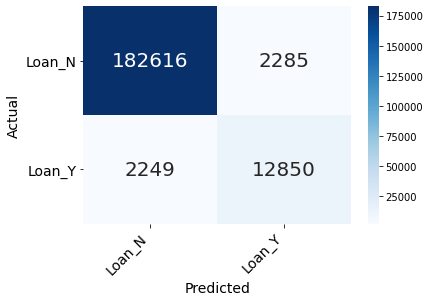

In [ ]:
# Looking at confusion Matrix (code also drawn from lecture and modified)

# Output the accuracy of our prediction
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

# Visualize the confusion matrix to make it easier to read (import confusion plt, matrix, and seaborn to visualize)
import seaborn as sns
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

con_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(con_matrix, ('Loan_N', 'Loan_Y'), ('Loan_N', 'Loan_Y'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d", cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.xlabel('Predicted', fontsize = 14)

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

### **Results:** This model, which predicts whether a loan request will be accpeted or rejected has completed and it has an accuracy of **0.9773**. It scores highly for recall and precision.

# **Predicting Defaults Model Cleaning and Imputing**
*   We only need the accepted data for this model, `adf`
*   Dropping many, many unneeded columns






Now that we have created a model that predicts whether a loan should be approved or rejected based on some basic criteria, we can create a model that predicts the default rate for loans that are approved.


---


We need to drop more of the variables that appear less useful so that the computer won't crash (unfortunately we need to drop a lot for the computer to run).

In [ ]:
# adata = pickle.load(open('/content/gdrive/MyDrive/COLLEGE/Senior/S2/BUSI_488/a02/Gamma 1 Project 2/accepted_pickle.pkl', 'rb')) #<-- PATH to NOAH's drive
adata = pickle.load(open('/content/gdrive/MyDrive/accepted_pickle.pkl', 'rb')) #<-- PATH to Cam's drive
adf = pd.DataFrame(adata)

In [ ]:
# These features are not informative to our task. Drop them.
adf.drop(['id', 'member_id', 'url', 'desc', 'title', 'zip_code'], axis=1, inplace = True)

# This feature is potentially discriminatory and bias based on job title
adf.drop(['emp_title'], axis=1, inplace = True)

adf.shape

(2260701, 144)



As we can see, we still have 144 columns. We need to cut this down further to the most important columns.

---
Because we care about defaulting moreso than "how bad" the default was, we can drop many columns related to the degree of defaulting (and can keep the binary features that flag defaulting)

---
We can also drop fico score columns after we get the average fico score for each customer.


In [ ]:
# Create Fico Score feature, the mean of the fico high and low ranges
adf['fico_score'] = (adf['fico_range_high'] + adf['fico_range_low']) / 2

# Drop more dates and settlement-related features
adf.drop(['settlement_amount', 'settlement_percentage', 'settlement_term', 'settlement_date', 'debt_settlement_flag', 'issue_d', 'earliest_cr_line', 'last_credit_pull_d', 'fico_range_high', 'fico_range_low', 'last_fico_range_high', 'last_fico_range_low'], axis = 1, inplace=True)

We can also drop most variables pertaining to hardship.

In [ ]:
adf.drop(columns = ['hardship_length', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'payment_plan_start_date', 'hardship_start_date', 'hardship_end_date'], axis=1, inplace=True)
adf.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,collections_12_mths_ex_med,...,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,disbursement_method,debt_settlement_flag_date,settlement_status,fico_score
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,10+ years,MORTGAGE,55000.0,Not Verified,Fully Paid,n,debt_consolidation,PA,5.91,0.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,0.0,...,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,NaN,NaN,677.0
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,10+ years,MORTGAGE,65000.0,Not Verified,Fully Paid,n,small_business,SD,16.06,1.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,0.0,...,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,NaN,NaN,717.0
2,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,10+ years,MORTGAGE,63000.0,Not Verified,Fully Paid,n,home_improvement,IL,10.78,0.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,22705.924294,22705.92,20000.00,2705.92,0.0,0.0,0.0,Jun-2017,15813.30,NaN,0.0,...,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,NaN,NaN,697.0
3,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,10+ years,MORTGAGE,110000.0,Source Verified,Current,n,debt_consolidation,NJ,17.06,0.0,0.0,NaN,NaN,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,31464.010000,31464.01,19102.35,12361.66,0.0,0.0,0.0,Feb-2019,829.90,Apr-2019,0.0,...,5.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,NaN,NaN,787.0
4,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,3 years,MORTGAGE,104433.0,Source Verified,Fully Paid,n,major_purchase,PA,25.37,1.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,w,0.00,0.00,11740.500000,11740.50,10400.00,1340.50,0.0,0.0,0.0,Jul-2016,10128.96,NaN,0.0,...,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,NaN,NaN,697.0


We can see that there are still some date variables. We will drop those. We can also drop variables related to fees (because fees indicate an event that would be described by other variables). There are also some more fico score variables that can be dropped.

In [ ]:
adf.drop(columns=['total_rec_late_fee', 'total_rec_int', 'last_pymnt_d', 'next_pymnt_d', 'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_earliest_cr_line', 'collection_recovery_fee'], axis=1, inplace=True)

We will also drop variables which have a high frequency of NA or zero values, given that they often times are signaled by edge cases that can be better represented by a flag variable. We wil try to keep these flag variables.

In [ ]:
adf.drop(columns=['mths_since_last_record', 'recoveries', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'tax_liens', 'revol_bal_joint', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_dpd', 'hardship_loan_status', 'orig_projected_additional_accrued_interest', 'debt_settlement_flag_date'], axis=1, inplace=True)

We will drop some vars related to the funded amount because they don't seem to be useful in predicting. We will also drop home ownership and public records because they could be discriminatory. We will also drop some variables related to delinquency and bankruptcy since many other flag variables will signal this. 

In [ ]:
adf.drop(columns=['home_ownership', 'funded_amnt_inv', 'funded_amnt', 'inq_last_6mths', 'mths_since_last_delinq', 'pub_rec', 'chargeoff_within_12_mths', 'delinq_amnt', 'mths_since_recent_revol_delinq'], axis = 1, inplace=True)
adf.shape

(2260701, 83)

In [ ]:
adf.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,open_acc,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,last_pymnt_amnt,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,...,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,settlement_status,fico_score
0,3600.0,36 months,13.99,123.03,C,C4,10+ years,55000.0,Not Verified,Fully Paid,n,debt_consolidation,PA,5.91,0.0,7.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,122.67,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,...,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,3.0,76.9,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,NaN,677.0
1,24700.0,36 months,11.99,820.28,C,C1,10+ years,65000.0,Not Verified,Fully Paid,n,small_business,SD,16.06,1.0,22.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,926.35,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,...,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,2.0,97.4,7.7,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,NaN,717.0
2,20000.0,60 months,10.78,432.66,B,B4,10+ years,63000.0,Not Verified,Fully Paid,n,home_improvement,IL,10.78,0.0,6.0,7869.0,56.2,18.0,w,0.00,0.00,22705.924294,22705.92,20000.00,15813.30,1.0,Joint App,71000.0,13.85,Not Verified,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,19.0,10827.0,...,2081.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.0,55.9,125.0,184.0,14.0,14.0,5.0,101.0,NaN,10.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,100.0,50.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,NaN,697.0
3,35000.0,60 months,14.85,829.90,C,C5,10+ years,110000.0,Source Verified,Current,n,debt_consolidation,NJ,17.06,0.0,13.0,7802.0,11.6,17.0,w,15897.65,15897.65,31464.010000,31464.01,19102.35,829.90,1.0,Individual,NaN,NaN,NaN,0.0,0.0,301500.0,1.0,1.0,0.0,1.0,23.0,12609.0,...,6987.0,45.0,67300.0,0.0,1.0,0.0,2.0,23192.0,54962.0,12.1,36.0,87.0,2.0,2.0,1.0,2.0,NaN,NaN,0.0,4.0,5.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,1.0,100.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,NaN,787.0
4,10400.0,60 months,22.45,289.91,F,F1,3 years,104433.0,Source Verified,Fully Paid,n,major_purchase,PA,25.37,1.0,12.0,21929.0,64.5,35.0,w,0.00,0.00,11740.500000,11740.50,10400.00,10128.96,1.0,Individual,NaN,NaN,NaN,0.0,0.0,331730.0,1.0,3.0,0.0,3.0,14.0,73839.0,...,9702.0,78.0,34000.0,2.0,1.0,3.0,10.0,27644.0,4567.0,77.5,128.0,210.0,4.0,4.0,6.0,4.0,12.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,4.0,96.6,60.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,NaN,697.0


Given that the person's income and DTI will give a good indicator of their means and debt, we can drop many of the debt variables. Likewise, we can drop variables describing how many accounts they have opened, given that we care more about debt and credit utilization than avaliable credit. We will also drop inquiries into their finances, given that this is not necessarily indicative of their habits.

In [ ]:
adf.drop(columns=['tot_coll_amt', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_tl_op_past_12m', 'percent_bc_gt_75'], axis=1, inplace=True)


In [ ]:
adf.drop(columns=['sub_grade', 'verification_status', 'verification_status_joint', 'pymnt_plan', 'policy_code', 'disbursement_method', 'initial_list_status', 'settlement_status', 'application_type', 'addr_state', 'hardship_flag'], axis=1, inplace=True)
adf.drop(columns=['total_bal_ex_mort', 'total_bc_limit',  'total_il_high_credit_limit', 'num_sats', 'open_rv_24m', 'open_rv_12m'], axis=1, inplace=True)
adf.drop(columns=['total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'last_pymnt_amnt', 'out_prncp_inv', 'out_prncp'], axis=1, inplace=True)
adf.drop(columns=['annual_inc_joint', 'dti_joint', 'il_util', 'total_bal_il'], axis=1, inplace=True)

# We will also drop the NA values that still exist
adf.dropna(inplace=True)

adf.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,annual_inc,loan_status,purpose,dti,delinq_2yrs,open_acc,revol_bal,revol_util,total_acc,acc_now_delinq,tot_cur_bal,bc_util,pct_tl_nvr_dlq,pub_rec_bankruptcies,tot_hi_cred_lim,fico_score
0,3600.0,36 months,13.99,123.03,C,10+ years,55000.0,Fully Paid,debt_consolidation,5.91,0.0,7.0,2765.0,29.7,13.0,0.0,144904.0,37.2,76.9,0.0,178050.0,677.0
1,24700.0,36 months,11.99,820.28,C,10+ years,65000.0,Fully Paid,small_business,16.06,1.0,22.0,21470.0,19.2,38.0,0.0,204396.0,27.1,97.4,0.0,314017.0,717.0
2,20000.0,60 months,10.78,432.66,B,10+ years,63000.0,Fully Paid,home_improvement,10.78,0.0,6.0,7869.0,56.2,18.0,0.0,189699.0,55.9,100.0,0.0,218418.0,697.0
3,35000.0,60 months,14.85,829.90,C,10+ years,110000.0,Current,debt_consolidation,17.06,0.0,13.0,7802.0,11.6,17.0,0.0,301500.0,12.1,100.0,0.0,381215.0,787.0
4,10400.0,60 months,22.45,289.91,F,3 years,104433.0,Fully Paid,major_purchase,25.37,1.0,12.0,21929.0,64.5,35.0,0.0,331730.0,77.5,96.6,0.0,439570.0,697.0


In [ ]:
adf.shape

(2022190, 22)

We need to remove loans that are still in progress from the data set so that we can get a clear view of completed/defaulted or delinquent loans.

In [ ]:
adf['loan_status'].value_counts()

Fully Paid            953238
Current               803179
Charged Off           234817
Late (31-120 days)     19333
In Grace Period         7739
Late (16-30 days)       3851
Default                   33
Name: loan_status, dtype: int64

We can see above that there are some values that we will also need to change to fully paid/defaulted.

We will first drop current loans.

In [ ]:
adf = adf[adf.loan_status != 'Current']
adf = adf[adf.loan_status.notnull()]
adf['loan_status'].value_counts()

Fully Paid            953238
Charged Off           234817
Late (31-120 days)     19333
In Grace Period         7739
Late (16-30 days)       3851
Default                   33
Name: loan_status, dtype: int64

Because it is unclear what will happen to 'Late (16-30 days)' and 'In Grace Period' loans, we will drop them as well.

In [ ]:
adf = adf[adf.loan_status != 'Late (16-30 days)']
adf = adf[adf.loan_status != 'In Grace Period']

Now we can reindex:

In [ ]:
adf.reset_index(inplace=True)
adf['loan_status'].value_counts()
adf.head()

,index,loan_amnt,term,int_rate,installment,grade,emp_length,annual_inc,loan_status,purpose,dti,delinq_2yrs,open_acc,revol_bal,revol_util,total_acc,acc_now_delinq,tot_cur_bal,bc_util,pct_tl_nvr_dlq,pub_rec_bankruptcies,tot_hi_cred_lim,fico_score
0,0,3600.0,36 months,13.99,123.03,C,10+ years,55000.0,Fully Paid,debt_consolidation,5.91,0.0,7.0,2765.0,29.7,13.0,0.0,144904.0,37.2,76.9,0.0,178050.0,677.0
1,1,24700.0,36 months,11.99,820.28,C,10+ years,65000.0,Fully Paid,small_business,16.06,1.0,22.0,21470.0,19.2,38.0,0.0,204396.0,27.1,97.4,0.0,314017.0,717.0
2,2,20000.0,60 months,10.78,432.66,B,10+ years,63000.0,Fully Paid,home_improvement,10.78,0.0,6.0,7869.0,56.2,18.0,0.0,189699.0,55.9,100.0,0.0,218418.0,697.0
3,4,10400.0,60 months,22.45,289.91,F,3 years,104433.0,Fully Paid,major_purchase,25.37,1.0,12.0,21929.0,64.5,35.0,0.0,331730.0,77.5,96.6,0.0,439570.0,697.0
4,5,11950.0,36 months,13.44,405.18,C,4 years,34000.0,Fully Paid,debt_consolidation,10.20,0.0,5.0,8822.0,68.4,6.0,0.0,12798.0,91.0,100.0,0.0,16900.0,692.0


We can now start to group some of these other categories into either default or fully paid by making assumptions about their current or future status.

First, we will change the statuses of the 'Late (31-120 days)', 'Does not meet the credit policy. Status:Charged Off', and 'Charged Off' to 'Default'. This is because each of these statuses indicates some sort of default, extreme lateness, or other bad signals about the loan.

In [ ]:
adf.loc[adf.loan_status == 'Charged Off', 'loan_status'] = 'Default'
adf.loc[adf.loan_status == 'Late (31-120 days)', 'loan_status'] = 'Default'
adf.loc[adf.loan_status == 'Does not meet the credit policy. Status:Charged Off', 'loan_status'] = 'Default'

adf['loan_status'].value_counts()

Fully Paid    953238
Default       254183
Name: loan_status, dtype: int64

And now we set 'Does not meet the credit policy. Status:Fully Paid' to Fully Paid.

In [ ]:
adf.loc[adf.loan_status == 'Does not meet the credit policy. Status:Fully Paid', 'loan_status'] = 'Fully Paid'

adf['loan_status'].value_counts()

Fully Paid    953238
Default       254183
Name: loan_status, dtype: int64

# **Implementing the Model For Predicting Defaults**
###  Our goal here is to create a model that accurately predicts if a borrower  will be **default on their loan**
- One-hot encoding
- Taking a random slice of the data
- Scaling data using `StandardScaler`
- utilizing `train_test_split`
- Instantiating a Logistic Regression model
- Evaluate model accuracy via Confusion Matrix

In [ ]:
adf.head()

,index,loan_amnt,term,int_rate,installment,grade,emp_length,annual_inc,loan_status,purpose,dti,delinq_2yrs,open_acc,revol_bal,revol_util,total_acc,acc_now_delinq,tot_cur_bal,bc_util,pct_tl_nvr_dlq,pub_rec_bankruptcies,tot_hi_cred_lim,fico_score
0,0,3600.0,36 months,13.99,123.03,C,10+ years,55000.0,Fully Paid,debt_consolidation,5.91,0.0,7.0,2765.0,29.7,13.0,0.0,144904.0,37.2,76.9,0.0,178050.0,677.0
1,1,24700.0,36 months,11.99,820.28,C,10+ years,65000.0,Fully Paid,small_business,16.06,1.0,22.0,21470.0,19.2,38.0,0.0,204396.0,27.1,97.4,0.0,314017.0,717.0
2,2,20000.0,60 months,10.78,432.66,B,10+ years,63000.0,Fully Paid,home_improvement,10.78,0.0,6.0,7869.0,56.2,18.0,0.0,189699.0,55.9,100.0,0.0,218418.0,697.0
3,4,10400.0,60 months,22.45,289.91,F,3 years,104433.0,Fully Paid,major_purchase,25.37,1.0,12.0,21929.0,64.5,35.0,0.0,331730.0,77.5,96.6,0.0,439570.0,697.0
4,5,11950.0,36 months,13.44,405.18,C,4 years,34000.0,Fully Paid,debt_consolidation,10.20,0.0,5.0,8822.0,68.4,6.0,0.0,12798.0,91.0,100.0,0.0,16900.0,692.0


In [ ]:
# Now we can encode our categorical variables.
adf = pd.get_dummies(data = adf, columns = ['term', 'grade', 'emp_length', 'purpose'])

adf.loc[adf.loan_status == 'Fully Paid', 'Loan Status'] = 1
adf.loc[adf.loan_status == 'Default', 'Loan Status'] = 0

# Drop 'loan_status'
adf.drop(columns='loan_status', axis=1, inplace=True)

adf.head()

,index,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,open_acc,revol_bal,revol_util,total_acc,acc_now_delinq,tot_cur_bal,bc_util,pct_tl_nvr_dlq,pub_rec_bankruptcies,tot_hi_cred_lim,fico_score,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,Loan Status
0,0,3600.0,13.99,123.03,55000.0,5.91,0.0,7.0,2765.0,29.7,13.0,0.0,144904.0,37.2,76.9,0.0,178050.0,677.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.0
1,1,24700.0,11.99,820.28,65000.0,16.06,1.0,22.0,21470.0,19.2,38.0,0.0,204396.0,27.1,97.4,0.0,314017.0,717.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1.0
2,2,20000.0,10.78,432.66,63000.0,10.78,0.0,6.0,7869.0,56.2,18.0,0.0,189699.0,55.9,100.0,0.0,218418.0,697.0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.0
3,4,10400.0,22.45,289.91,104433.0,25.37,1.0,12.0,21929.0,64.5,35.0,0.0,331730.0,77.5,96.6,0.0,439570.0,697.0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1.0
4,5,11950.0,13.44,405.18,34000.0,10.20,0.0,5.0,8822.0,68.4,6.0,0.0,12798.0,91.0,100.0,0.0,16900.0,692.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.0


Now we will take a sample of the adf data to make it more managable and to hopefully avoid crashes (we had to make the sample rather small to avoid issues).

In [ ]:
#Taking a random slice of adf, so that the model can run given our computational limits
adf = adf.sample(n=500000, random_state = 50)
adfPreScale = adf.copy()

Now we can quickly scale our features.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

adfScaled = pd.DataFrame(scaler.fit_transform(adf),columns = adf.columns)

adfScaled.head()

,index,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,open_acc,revol_bal,revol_util,total_acc,acc_now_delinq,tot_cur_bal,bc_util,pct_tl_nvr_dlq,pub_rec_bankruptcies,tot_hi_cred_lim,fico_score,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,Loan Status
0,0.141103,2.293422,0.665126,2.988953,0.969784,-1.399548,-0.366243,-0.691324,0.178251,-0.179277,-1.17856,-0.065926,-0.629505,0.359200,0.667152,-0.354563,-0.593878,-0.170066,0.578680,-0.578680,-0.454429,-0.637848,-0.638304,2.383449,-0.274512,-0.15559,-0.082548,-0.273018,-0.740291,-0.32524,3.294919,-0.259474,-0.265796,-0.225383,-0.220839,-0.225496,-0.20483,-0.302916,-0.098671,-0.536195,-1.191793,0.0,-0.260487,-0.072187,-0.145796,-0.105627,-0.081161,4.146292,-0.024625,-0.101936,-0.081198,-0.026201,0.51754
1,-1.441362,0.020700,-1.330488,0.049353,0.983366,-0.047707,-0.366243,-0.510623,0.443224,0.480253,0.39730,-0.065926,2.576550,0.426532,0.667152,-0.354563,2.405148,1.907048,0.578680,-0.578680,2.200565,-0.637848,-0.638304,-0.419560,-0.274512,-0.15559,-0.082548,-0.273018,-0.740291,-0.32524,-0.303498,-0.259474,-0.265796,-0.225383,-0.220839,4.434668,-0.20483,-0.302916,-0.098671,-0.536195,0.839072,0.0,-0.260487,-0.072187,-0.145796,-0.105627,-0.081161,-0.241179,-0.024625,-0.101936,-0.081198,-0.026201,0.51754
2,0.332844,-0.908276,-0.062441,-0.830668,-0.184684,-1.576197,-0.366243,-1.414128,-0.690478,-1.283988,-1.01268,-0.065926,-0.869245,-2.128556,0.667152,-0.354563,-0.929186,2.226605,0.578680,-0.578680,-0.454429,-0.637848,1.566652,-0.419560,-0.274512,-0.15559,-0.082548,-0.273018,1.350820,-0.32524,-0.303498,-0.259474,-0.265796,-0.225383,-0.220839,-0.225496,-0.20483,-0.302916,-0.098671,-0.536195,0.839072,0.0,-0.260487,-0.072187,-0.145796,-0.105627,-0.081161,-0.241179,-0.024625,-0.101936,-0.081198,-0.026201,0.51754
3,-0.105726,-0.547481,0.769064,-0.351631,-0.184684,0.010471,-0.366243,-0.510623,-0.267666,-0.410112,-1.26150,-0.065926,-0.762726,0.975823,0.667152,-0.354563,-0.709303,-0.489622,0.578680,-0.578680,-0.454429,-0.637848,-0.638304,2.383449,-0.274512,-0.15559,-0.082548,-0.273018,-0.740291,-0.32524,-0.303498,-0.259474,-0.265796,4.436885,-0.220839,-0.225496,-0.20483,-0.302916,-0.098671,-0.536195,0.839072,0.0,-0.260487,-0.072187,-0.145796,-0.105627,-0.081161,-0.241179,-0.024625,-0.101936,-0.081198,-0.026201,0.51754
4,0.002866,0.915584,0.827270,0.463548,-0.361250,0.050666,-0.366243,0.212182,-0.146906,-0.579116,-0.59798,-0.065926,0.267758,-0.540928,-0.603141,-0.354563,0.214804,-0.489622,-1.728069,1.728069,-0.454429,-0.637848,-0.638304,2.383449,-0.274512,-0.15559,-0.082548,-0.273018,1.350820,-0.32524,-0.303498,-0.259474,-0.265796,-0.225383,-0.220839,-0.225496,-0.20483,-0.302916,-0.098671,-0.536195,0.839072,0.0,-0.260487,-0.072187,-0.145796,-0.105627,-0.081161,-0.241179,-0.024625,-0.101936,-0.081198,-0.026201,0.51754


First we will split out training and testing data, 80% and 20% respectively.

In [ ]:
# importing train_test_split again (running the other code causes it to code)
from sklearn.model_selection import train_test_split

X2 = adfScaled.drop(columns='Loan Status')
y2 = adfPreScale['Loan Status']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2,
test_size=0.3,
stratify=y2,
random_state=42)


#Creating this for ROI calculations later
X2_unscaled = adfPreScale.drop(columns='Loan Status')
y2_unscaled = adfPreScale['Loan Status']

X2_train_unscaled, X2_test_unscaled, y2_train_unscaled, y2_test_unscaled = train_test_split(X2_unscaled, y2_unscaled,
test_size=0.3,
stratify=y2_unscaled,
random_state=42)

We will use a logistic regression model, which will give us a percent estimate of default.

In [ ]:
from sklearn.linear_model import LogisticRegression

logMod = LogisticRegression(random_state=40, solver='lbfgs', multi_class='auto')

logMod.fit(X2_train, y2_train)

y_pred2_binary = logMod.predict(X2_test)
y_pred2_prob = logMod.predict_proba(X2_test)

Now we can check the accuracy of our model using our testing data.

In [ ]:
from sklearn.metrics import accuracy_score

print('Accuracy:')
print(accuracy_score(y2_test, y_pred2_binary))
print('-----------------------------------------------------')
print('Value Counts')
print(pd.Series(y_pred2_binary).value_counts())

Accuracy:
0.79182
-----------------------------------------------------
Value Counts
1.0    145850
0.0      4150
dtype: int64


Generate confusion matrix for our predictions.

Text(0.5, 14.09375, 'Predicted')

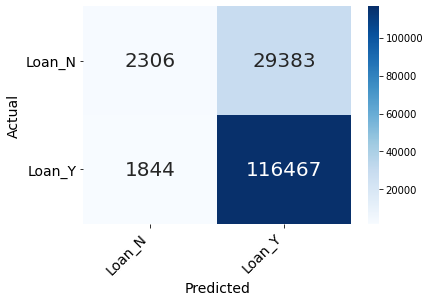

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

con_matrix = confusion_matrix(y2_test, y_pred2_binary)
confusion_matrix_df = pd.DataFrame(con_matrix, ('Loan_N', 'Loan_Y'), ('Loan_N', 'Loan_Y'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d", cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.xlabel('Predicted', fontsize = 14)

# **Calculating ROI**

We can use y_pred2_prob to find the model's extimated probability that a loan is payed in full.

In [ ]:
y_pred2_prob = pd.DataFrame(y_pred2_prob)
y_pred2_prob.columns = ['Chance of Default', 'Chance of Full Payment']
y_pred2_prob.drop(columns='Chance of Default', inplace=True)
y_pred2_prob.head()

,Chance of Full Payment
0,0.789595
1,0.705190
2,0.961111
3,0.946710
4,0.937981


In [ ]:
X2_test_unscaled.reset_index(inplace=True)
X2_test_unscaled.head()

,level_0,index,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,open_acc,revol_bal,revol_util,total_acc,acc_now_delinq,tot_cur_bal,bc_util,pct_tl_nvr_dlq,pub_rec_bankruptcies,tot_hi_cred_lim,fico_score,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,651490,1139226,8000.0,12.39,267.21,50000.0,19.54,0.0,22.0,8030.0,86.3,35.0,0.0,178547.0,96.8,91.4,0.0,145702.0,682.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,314819,378518,7075.0,17.14,252.74,39301.0,32.79,4.0,8.0,2969.0,48.7,38.0,0.0,50321.0,63.3,72.4,1.0,58529.0,662.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,33944,41282,13000.0,5.32,391.50,85000.0,6.52,0.0,8.0,10126.0,28.1,15.0,0.0,150892.0,36.2,100.0,0.0,188577.0,782.0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,788852,1294860,9500.0,6.62,291.69,95500.0,13.81,1.0,18.0,9429.0,17.0,40.0,0.0,256333.0,22.0,98.0,0.0,309223.0,717.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,118757,144811,14000.0,6.24,427.44,85000.0,23.08,0.0,16.0,23623.0,45.3,31.0,0.0,260758.0,43.9,100.0,0.0,308878.0,722.0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


Here we add these probabilites to the dataframe.

In [ ]:
X2_test_unscaled['Chance of Full Payment'] = y_pred2_prob['Chance of Full Payment']
X2_test_unscaled.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,level_0,index,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,open_acc,revol_bal,revol_util,total_acc,acc_now_delinq,tot_cur_bal,bc_util,pct_tl_nvr_dlq,pub_rec_bankruptcies,tot_hi_cred_lim,fico_score,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,Chance of Full Payment
0,651490,1139226,8000.0,12.39,267.21,50000.0,19.54,0.0,22.0,8030.0,86.3,35.0,0.0,178547.0,96.8,91.4,0.0,145702.0,682.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.789595
1,314819,378518,7075.0,17.14,252.74,39301.0,32.79,4.0,8.0,2969.0,48.7,38.0,0.0,50321.0,63.3,72.4,1.0,58529.0,662.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.705190
2,33944,41282,13000.0,5.32,391.50,85000.0,6.52,0.0,8.0,10126.0,28.1,15.0,0.0,150892.0,36.2,100.0,0.0,188577.0,782.0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.961111
3,788852,1294860,9500.0,6.62,291.69,95500.0,13.81,1.0,18.0,9429.0,17.0,40.0,0.0,256333.0,22.0,98.0,0.0,309223.0,717.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.946710
4,118757,144811,14000.0,6.24,427.44,85000.0,23.08,0.0,16.0,23623.0,45.3,31.0,0.0,260758.0,43.9,100.0,0.0,308878.0,722.0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.937981


Now we can calculate our expected return on investment. First we need to calculate the profit from the loan if it is paid in full.

We will make the assumption that we can calculate the future value through the loan amount, interest rate, and loan term.

In [ ]:
# This line will remove some error messages that dont affect the code
pd.options.mode.chained_assignment = None

X2_test_unscaled['Loan ROI'] = ((X2_test_unscaled['installment'] * (36 * X2_test_unscaled['term_ 36 months'] + 60 * X2_test_unscaled['term_ 60 months']) / X2_test_unscaled['loan_amnt'] - 1) * X2_test_unscaled['Chance of Full Payment'])

X2_test_unscaled.loc[X2_test_unscaled['term_ 36 months'] == 1, 'Loan ROI 36 / Year'] = X2_test_unscaled['Loan ROI'] / 3
X2_test_unscaled.loc[X2_test_unscaled['term_ 60 months'] == 1, 'Loan ROI 60 / Year'] = X2_test_unscaled['Loan ROI'] / 5

X2_test_unscaled['Loan ROI 36 / Year'] = X2_test_unscaled['Loan ROI 36 / Year'].fillna(0)
X2_test_unscaled['Loan ROI 60 / Year'] = X2_test_unscaled['Loan ROI 60 / Year'].fillna(0)

X2_test_unscaled.head()

,level_0,index,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,open_acc,revol_bal,revol_util,total_acc,acc_now_delinq,tot_cur_bal,bc_util,pct_tl_nvr_dlq,pub_rec_bankruptcies,tot_hi_cred_lim,fico_score,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,Chance of Full Payment,Loan ROI,Loan ROI 36 / Year,Loan ROI 60 / Year
0,651490,1139226,8000.0,12.39,267.21,50000.0,19.54,0.0,22.0,8030.0,86.3,35.0,0.0,178547.0,96.8,91.4,0.0,145702.0,682.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.789595,0.159850,0.053283,0.0
1,314819,378518,7075.0,17.14,252.74,39301.0,32.79,4.0,8.0,2969.0,48.7,38.0,0.0,50321.0,63.3,72.4,1.0,58529.0,662.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.705190,0.201703,0.067234,0.0
2,33944,41282,13000.0,5.32,391.50,85000.0,6.52,0.0,8.0,10126.0,28.1,15.0,0.0,150892.0,36.2,100.0,0.0,188577.0,782.0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.961111,0.080881,0.026960,0.0
3,788852,1294860,9500.0,6.62,291.69,95500.0,13.81,1.0,18.0,9429.0,17.0,40.0,0.0,256333.0,22.0,98.0,0.0,309223.0,717.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.946710,0.099737,0.033246,0.0
4,118757,144811,14000.0,6.24,427.44,85000.0,23.08,0.0,16.0,23623.0,45.3,31.0,0.0,260758.0,43.9,100.0,0.0,308878.0,722.0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.937981,0.092983,0.030994,0.0


Now we can calculate the average three year ROI for the loans, which we can compare to a 3 year treasury bond.

In [ ]:
numberOf36 = X2_test_unscaled['term_ 36 months'].sum()
numberOf60 = X2_test_unscaled['term_ 60 months'].sum()

percent60 = numberOf60 / (numberOf36 + numberOf60)

avgROIPerYear = (X2_test_unscaled['Loan ROI 36 / Year'].mean() * (1 - percent60) + X2_test_unscaled['Loan ROI 60 / Year'].mean() * percent60)
avgROI3Year = avgROIPerYear * 3
avgROI3Year

0.10156320151138759

In [ ]:
X2_test_unscaled.sort_values(by='Loan ROI', ascending=False, inplace=True)
X2_test_unscaled.head()

,level_0,index,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,open_acc,revol_bal,revol_util,total_acc,acc_now_delinq,tot_cur_bal,bc_util,pct_tl_nvr_dlq,pub_rec_bankruptcies,tot_hi_cred_lim,fico_score,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,Chance of Full Payment,Loan ROI,Loan ROI 36 / Year,Loan ROI 60 / Year
131399,498529,911686,40000.0,30.84,1314.86,311000.0,25.77,0.0,26.0,435142.0,62.4,33.0,0.0,1318491.0,68.9,100.0,0.0,1466275.0,712.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.823357,0.800541,0.0,0.160108
80756,1159110,2168625,35000.0,24.74,1021.97,750000.0,7.70,1.0,21.0,46184.0,32.8,55.0,0.0,2091988.0,33.3,98.1,0.0,2324965.0,692.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.930400,0.699613,0.0,0.139923
24967,1149578,2145273,35000.0,29.69,1125.72,385000.0,15.96,0.0,13.0,140999.0,83.0,34.0,0.0,1117578.0,60.0,91.0,0.0,1159581.0,682.0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.727501,0.676434,0.0,0.135287
140502,212377,257367,35000.0,22.99,986.47,300000.0,19.96,0.0,15.0,486072.0,6.3,26.0,0.0,2180323.0,6.5,100.0,0.0,2468058.0,737.0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.974936,0.673770,0.0,0.134754
50590,209561,253988,35000.0,23.99,1006.68,357000.0,14.64,2.0,20.0,48250.0,67.4,39.0,1.0,2200615.0,80.7,89.5,0.0,2365875.0,672.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.914904,0.663980,0.0,0.132796
